# Überschrift

Heute werden wir mit Generativer AI arbeiten. Das beschreibt AI Modelle, welche basierend auf einem Prompt (einer Eingabe in der Form von Text, Bildern, Punkte) neue Daten erzeugt (z.B.: Bilder)

# Inhalt der Einheit
- Grundlage dieser Idee (Autoencoder): Erzeugen von Zahlen
- Interpolieren zwischen Bildern: Wie wird aus einer 1 eine 5 für eine AI
- (Style) GAN: Erzeugung von Bildern von Menschen
- Segmentierung: Einzeichnen von Objekten in Bildern (z.B.: werden alle Äpfel in einem Bild grün hinterlegt und alle Birnen rot)
- Exkurs, Generative AI für Text (Llama)
- Kombination von Text und Bild, Diffusionsmodelle: Erzeugen von Bildern basierend auf Text

Erst müssen wir einige Module installieren, das wird eine Weile dauern:

In [ ]:
%pip install diffusers transformers torch scipy tqdm ipywidgets accelerate safetensors gdown matplotlib replicate
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install torch torchvision torchaudio numpy opencv-python matplotlib
!pip install kagglehub

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\mtschuchnig\appdata\local\temp\pip-req-build-8o87yq5r
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\MTschuchnig\AppData\Local\Temp\pip-req-build-8o87yq5r'


Model loaded from autoencoder.pth


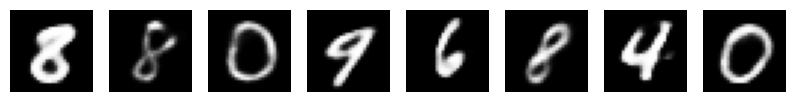

In [ ]:
import torch
import dlmodels
device = "cuda" if torch.cuda.is_available() else "cpu"

# Wir müssen das Modell nicht neu trainieren, ich habe euch bereits Trainingsresultate mitgegeben
trainAutoencoder = False

# Wir laden das Modell
model = dlmodels.Autoencoder().to(device)

# Erst müssen die Daten (wir versuchen die Zahlen 0-9 zu erzeugen) geladen werden
model.datenLaden()

# Hier könnt ihr das Modell trainieren (mehr dazu im letztem Labor)
model.train(trainAutoencoder)

# Danach erstellen wir 8 Bilder mithilfe unseres Modells
creativitaet = 0.5
images = model.generateImages(creativitaet)

# Und zeichnen diese
model.displayImages(images)

Model loaded from convautoencoder.pth


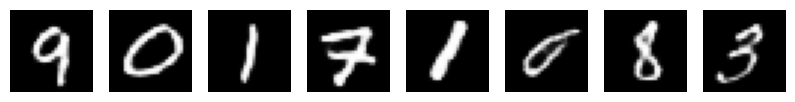

In [ ]:
import torch
import dlmodels
device = "cuda" if torch.cuda.is_available() else "cpu"

trainFaltungsAutoencoder = False

model = dlmodels.ConvAutoencoder().to(device)
model.datenLaden()
model.train(trainFaltungsAutoencoder)
creativitaet = 0.5
images = model.generateImages(creativitaet)
model.displayImages(images)

Model loaded from convautoencoder.pth


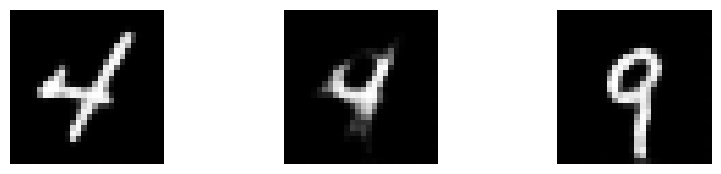

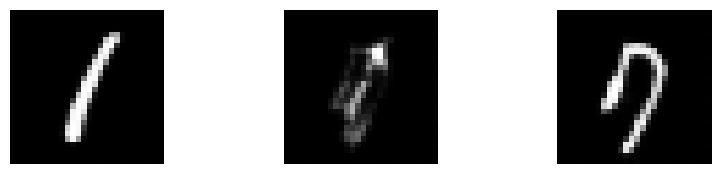

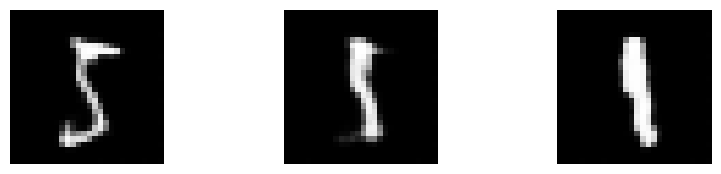

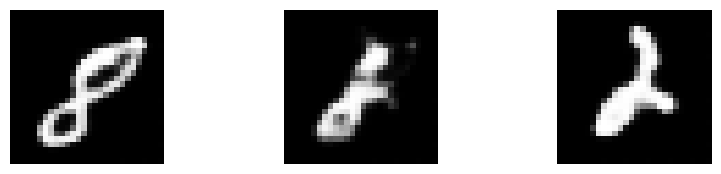

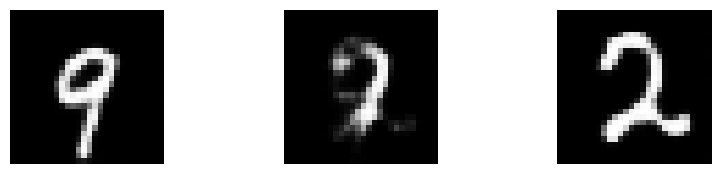

In [ ]:
import torch
import dlmodels
device = "cuda" if torch.cuda.is_available() else "cpu"

model = dlmodels.ConvAutoencoder().to(device)
model.datenLaden()
model.train(False)
model.interpolate(steps=3)
model.interpolate(steps=3)
model.interpolate(steps=3)
model.interpolate(steps=3)
model.interpolate(steps=3)

Model loaded from convvae.pth


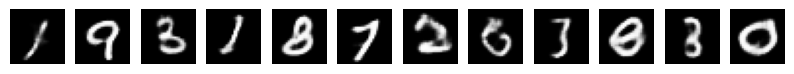

In [ ]:
# VAE
import torch
import dlmodels
device = "cuda" if torch.cuda.is_available() else "cpu"

trainFaltungsVariationalAutoencoder = False

model = dlmodels.ConvVAE().to(device)
model.datenLaden()
model.train(trainFaltungsVariationalAutoencoder)
newImages = model.generateImages(num_samples=12)

# Diese hier erzeugten Bilder sind nun komplett neu!
model.displayImages(newImages)

Using cache found in C:\Users\MTschuchnig/.cache\torch\hub\ndahlquist_pytorch-hub-stylegan_0.0.1
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18249047..1.1441987].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10525596..1.243166].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0109438..1.1063943].


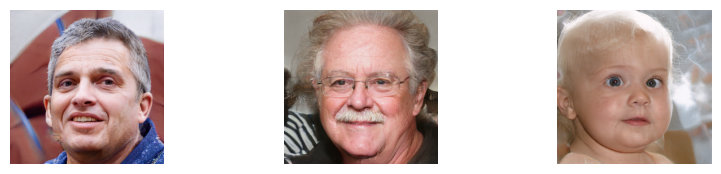

In [ ]:
# StyleGAN
import torch
import dlmodels
device = "cuda" if torch.cuda.is_available() else "cpu"

model = dlmodels.StyleGan()

generated_images = model.generateImages(5)
model.displayImages(generated_images)

Using cache found in C:\Users\MTschuchnig/.cache\torch\hub\ndahlquist_pytorch-hub-stylegan_0.0.1
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2616049..1.2334073].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17335445..1.427214].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30906516..1.3056204].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20177191..1.235361].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10060406..1.142268].


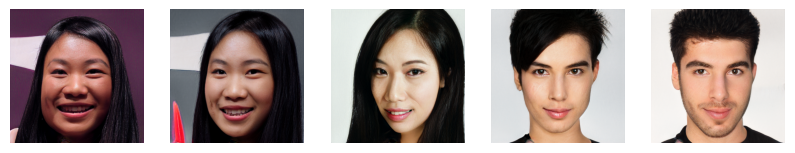

In [ ]:
# StyleGAN - Interpolation
import torch
import dlmodels
device = "cuda" if torch.cuda.is_available() else "cpu"

model = dlmodels.StyleGan()
interpolation_image_steps = model.interpolate(steps=3)
model.displayImages(interpolation_image_steps)

Unique values in mask 1: [0 1 2]
Unique values in mask 2: [0 1 2]
Unique values in mask 3: [0 1 2]


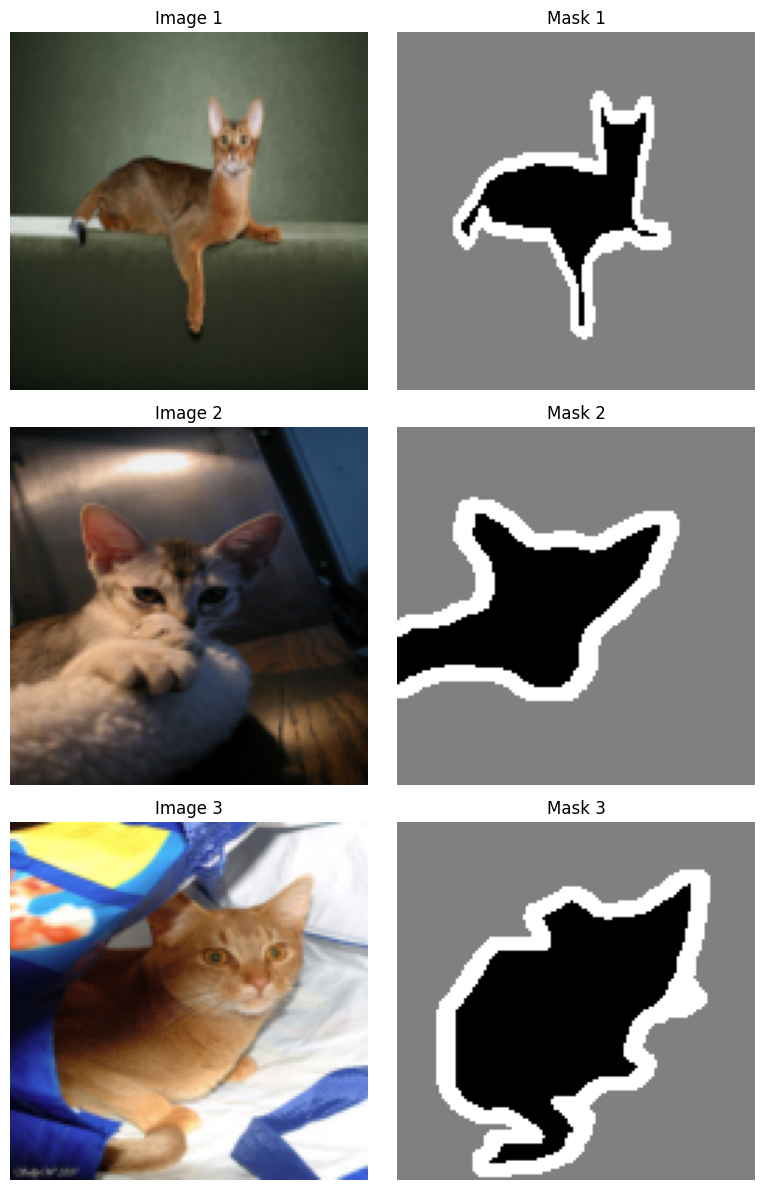

Training U-Net Model...


Epoch 1/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:29<00:00, 10.34batch/s]


Epoch [1/25], Loss: 0.7200


Epoch 2/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:29<00:00, 10.29batch/s]


Epoch [2/25], Loss: 0.6161


Epoch 3/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.22batch/s]


Epoch [3/25], Loss: 0.4917


Epoch 4/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.21batch/s]


Epoch [4/25], Loss: 0.4215


Epoch 5/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:29<00:00, 10.27batch/s]


Epoch [5/25], Loss: 0.3962


Epoch 6/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.20batch/s]


Epoch [6/25], Loss: 0.3685


Epoch 7/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.23batch/s]


Epoch [7/25], Loss: 0.3552


Epoch 8/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.19batch/s]


Epoch [8/25], Loss: 0.3374


Epoch 9/25: 100%|█████████████████████████████████████████████████████████████████| 924/924 [01:31<00:00, 10.14batch/s]


Epoch [9/25], Loss: 0.3302


Epoch 10/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.17batch/s]


Epoch [10/25], Loss: 0.3177


Epoch 11/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.16batch/s]


Epoch [11/25], Loss: 0.3070


Epoch 12/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.18batch/s]


Epoch [12/25], Loss: 0.2936


Epoch 13/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:31<00:00, 10.11batch/s]


Epoch [13/25], Loss: 0.2830


Epoch 14/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:31<00:00, 10.14batch/s]


Epoch [14/25], Loss: 0.2694


Epoch 15/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.23batch/s]


Epoch [15/25], Loss: 0.2690


Epoch 16/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.18batch/s]


Epoch [16/25], Loss: 0.2518


Epoch 17/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.15batch/s]


Epoch [17/25], Loss: 0.2464


Epoch 18/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.17batch/s]


Epoch [18/25], Loss: 0.2359


Epoch 19/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:31<00:00, 10.11batch/s]


Epoch [19/25], Loss: 0.2247


Epoch 20/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.16batch/s]


Epoch [20/25], Loss: 0.2219


Epoch 21/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:31<00:00, 10.14batch/s]


Epoch [21/25], Loss: 0.2139


Epoch 22/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.22batch/s]


Epoch [22/25], Loss: 0.2048


Epoch 23/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:30<00:00, 10.19batch/s]


Epoch [23/25], Loss: 0.2018


Epoch 24/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:31<00:00, 10.15batch/s]


Epoch [24/25], Loss: 0.1902


Epoch 25/25: 100%|████████████████████████████████████████████████████████████████| 924/924 [01:29<00:00, 10.32batch/s]

Epoch [25/25], Loss: 0.1857
Model saved to unet_model.pth


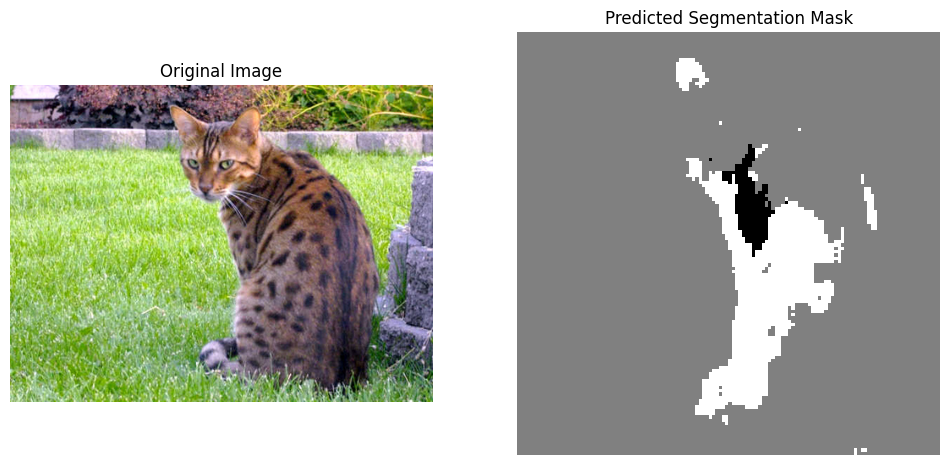

In [ ]:
import torch
import dlmodels
from torch.utils.data import DataLoader, Dataset
device = "cuda" if torch.cuda.is_available() else "cpu"

trainUnet = True

# Pfad zu den Daten
IMAGE_DIR = "./data/pets/images/"
MASK_DIR = "./data/pets/annotations/trimaps/"

# Laden der Daten zum trainieren
dataset = dlmodels.PetDataset(IMAGE_DIR, MASK_DIR)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)
# Visualize the first few images and masks
dlmodels.visualize_images_and_masks(dataset)


model = dlmodels.UNet(device=device, num_classes=3)  # Initialize the U-Net model
trainer = dlmodels.UNetTrainer(model, train_loader, device=device)
trainer.train(train_model=trainUnet)

# Assuming you have a UNet model defined as in your trainer class
model.eval()
model.generateSegmentations("Bengal_191.jpg")


In [ ]:
# Exkurs: Text mittels LLM
import dlmodels

# Hier seht ihr die Llama 2 und Llama 3 Familie, welche unterschiedliche Modelle sind um Text zu verarbeiten. 3 Modelle sind neuer und höhere Zahlen sind meistens besser aber langsamer
dlmodels.llama2_family()
dlmodels.llama3_family()

In [ ]:
import os
from getpass import getpass

# Da Sprachmodelle sehr viele Ressourcen benötigen, lassen wir diese auf einem externem Server laufen. Hierfür müsst ihr den Code: RAPLICATE_API_TOKEN in das eben geöffnete Feld kopieren
# Das kostet Geld, bitte verwendet das Sprachmodell sparsam
REPLICATE_API_TOKEN = getpass()
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

 ········


In [ ]:
# Verwenden von Llama für einfache Fragen
import dlmodels

prompt = "The typical color of a llama is: "
output = dlmodels.llama3_8b(prompt)
dlmodels.md(output)

output = dlmodels.llama3_8b("The typical color of a llama is what? Answer in one word.")
dlmodels.md(output)

# Was ist das Problem hier? Warum funktioniert das nicht?
prompt = "What animal family are they? Answer the question in few words.: "
output = dlmodels.llama3_8b(prompt)
dlmodels.md(output)



The typical color of a llama is white! However, llamas can also come in a variety of other colors such as light brown, dark brown, black, gray, and even spotted or patched colors. But white is the most common and traditional color for llamas.



White.



Mammals.

In [ ]:
# Llama kann sich nicht an das Geschpräch erinnern, wir müssen also ein Gedächtnis einbauen
import dlmodels

# Ohne Gedächtnis
prompt = """
User: ...
Assistant: ...
User: What animal family are they? Answer the question with one word.
"""

output = dlmodels.llama3_8b(prompt)
dlmodels.md(output)

# Mit Gedächtnis
prompt = """
User: The typical color of a llama is what? Answer in one word.
Assistant: brown
User: What animal family are they? Answer the question with one word.
"""

output = dlmodels.llama3_8b(prompt)
dlmodels.md(output)



Felines



Camelid

In [ ]:
# Sprachmodelle funktionieren meistens besser wenn wir ihnen erlauben, laut zu denken. Man nennt das Chain-of-Thought Prompting.
# Wenn wir Llama nicht erlauben, tut es sich schwerer, mit Logischen Aufgaben wie rechnen (Llama verewndet standardmäßif Chain-of-Thought Promptimng, daher müssen wir das aktiv deaktivieren mit "answer in one word").
import dlmodels

prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = dlmodels.llama3_8b(prompt)
dlmodels.md(output)

prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Think loudly while solving the problem.
'''

output = dlmodels.llama3_8b(prompt)
dlmodels.md(output)



Seven.



Hmmm... Let me think this through...

Llama started with 5 tennis balls, so that's a good starting point. Then, it buys 2 more cans of tennis balls. Each can has 3 tennis balls, so that's a total of 2 x 3 = 6 new tennis balls.

But wait, Llama bought 2 cans, not just one! So, we need to multiply the number of tennis balls per can by 2, not just 1. That means we have 3 x 2 = 6 tennis balls from the two cans.

Now, let's add the new tennis balls to the original 5 Llama had. We have 5 + 6 = 11 tennis balls!

Hmmm... Is that correct? Yeah, I think it is! Llama now has 11 tennis balls!

In [ ]:
# Stable Diffusion
# Jetzt wissen wir wie wir Bilder und Text erzeugen, das ganze kann natürlich kombiniert werden um aus Text Bildern zu erzeugen
from diffusers import StableDiffusionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Achtung! Das ganze dauert sehr lange. Bevor ihr startet fragt bitte den Kursleiter ob er euch helfen kann diesen Code auf Google Colab auszuführen!
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)  # Laden des Modelles
prompt = "Astronaut in a space, in a space station, looking at the planet mars"  # Deine Eingabe
image = pipe(prompt, num_inference_steps=50).images[0]  # Starten des Bilderzeugungsprozesses. Mit num_inference_steps könnt ihr angeben wie gut euer Bild wird.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

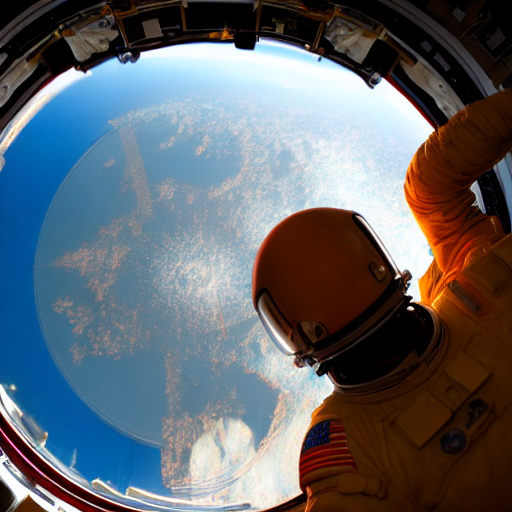

In [ ]:
image

In [ ]:
# Wir können auch ein Bild vorgeben, an welches sich die AI dann mehr oder weniger hält
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"


# Achtung! Das ganze dauert sehr lange. Bevor ihr startet fragt bitte den Kursleiter ob er euch helfen kann diesen Code auf Google Colab auszuführen!
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)  # Laden des Modelles
prompt = "Astronaut in a space, in a space station, looking at the planet mars"  # Deine Eingabe
image_path = 'astronaut1.png'  # Laden des Referenzbildes
init_image = Image.open(image_path).convert("RGB")  # Umwandeln des Bildes in RGB
image = pipe(prompt=prompt, init_image=init_image, num_inference_steps=50, strength=0.25).images[0]  # Starten des Bilderzeugungsprozesses. Mit num_inference_steps könnt ihr angeben wie gut euer Bild wird.
# Mit strength wie stark die Bildgeneration das initiale Bild verändern soll


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

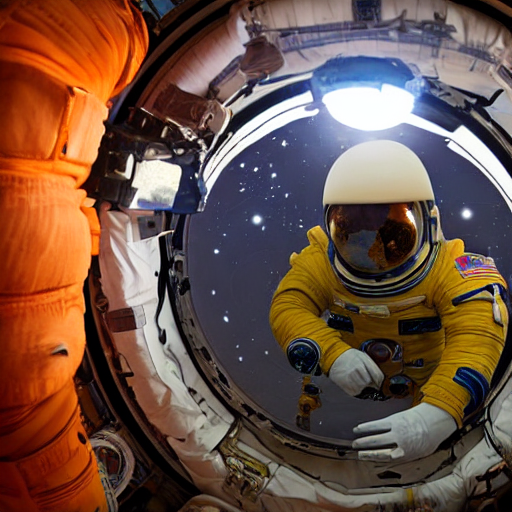

In [ ]:
image